In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from data_loader import CSVDataloader, get_file_path
from data_processing import Processing
from feature_engineering import FeatureEngineering
from credit_scoring import CreditScoring
from train_model import RiskPrediction

## Load Credit Risk data for Analysis

In [2]:
# Load AAPL data
data = get_file_path("csvpath")
df = CSVDataloader(data).load_data()

In [3]:
df.shape

(95662, 16)

In [3]:
preprocess = Processing(df)


In [5]:
# Call functions
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Overview of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
df.size

1530592

In [9]:
df.shape

(95662, 16)

In [5]:
df['ChannelId'].value_counts()

ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

In [6]:
df['ProviderId'].value_counts()

ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64

In [7]:
df['ProductCategory'].value_counts()

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

### Summary Statistics

In [8]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

In [14]:
# Central Tendency
print("\n--- Central Tendency ---")
print("Mean:\n", numeric_cols.mean())
print("Median:\n", numeric_cols.median())
print("Mode:\n", numeric_cols.mode().iloc[0])


--- Central Tendency ---
Mean:
 CountryCode         256.000000
Amount             6717.846433
Value              9900.583941
PricingStrategy       2.255974
FraudResult           0.002018
dtype: float64
Median:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
dtype: float64
Mode:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
Name: 0, dtype: float64


In [9]:
# Dispersion
print("\n--- Dispersion ---")
print("Standard Deviation:\n", numeric_cols.std())


--- Dispersion ---
Standard Deviation:
 CountryCode             0.000000
Amount             123306.797164
Value              123122.087776
PricingStrategy         0.732924
FraudResult             0.044872
dtype: float64


In [10]:
print("Variance:\n", numeric_cols.var())

Variance:
 CountryCode        0.000000e+00
Amount             1.520457e+10
Value              1.515905e+10
PricingStrategy    5.371778e-01
FraudResult        2.013471e-03
dtype: float64


In [11]:
print("Range:\n", numeric_cols.max() - numeric_cols.min())

Range:
 CountryCode               0.0
Amount             10880000.0
Value               9879998.0
PricingStrategy           4.0
FraudResult               1.0
dtype: float64


In [12]:
print("Interquartile Range (IQR):\n", numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25))

Interquartile Range (IQR):
 CountryCode           0.0
Amount             2850.0
Value              4725.0
PricingStrategy       0.0
FraudResult           0.0
dtype: float64


In [13]:
# Shape of Distribution
print("\n--- Shape of Distribution ---")
print("Skewness:\n", numeric_cols.skew())


--- Shape of Distribution ---
Skewness:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [14]:
print("Kurtosis:\n", numeric_cols.kurtosis())

Kurtosis:
 CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


### Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


In [4]:
preprocess = Processing(df)

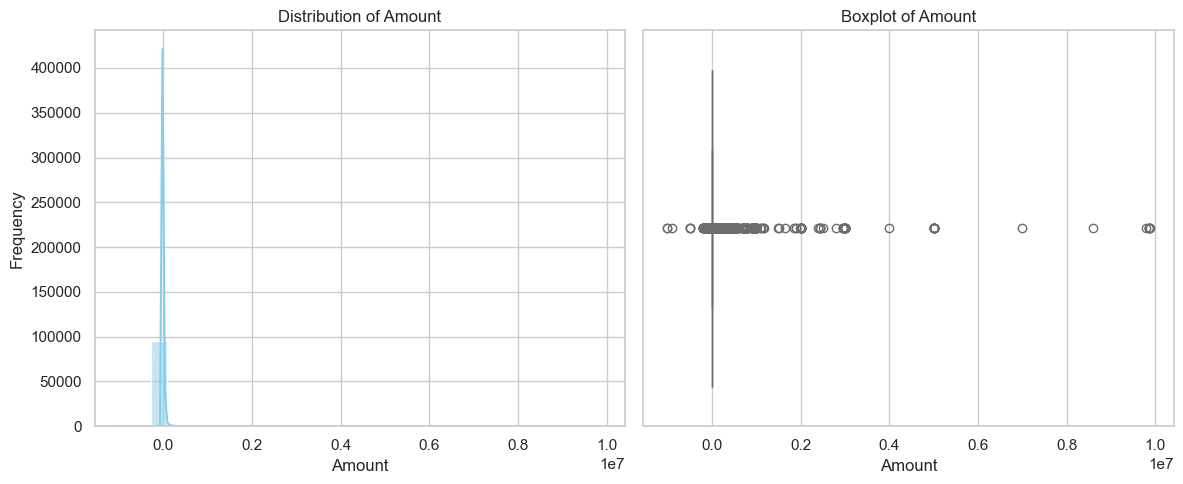

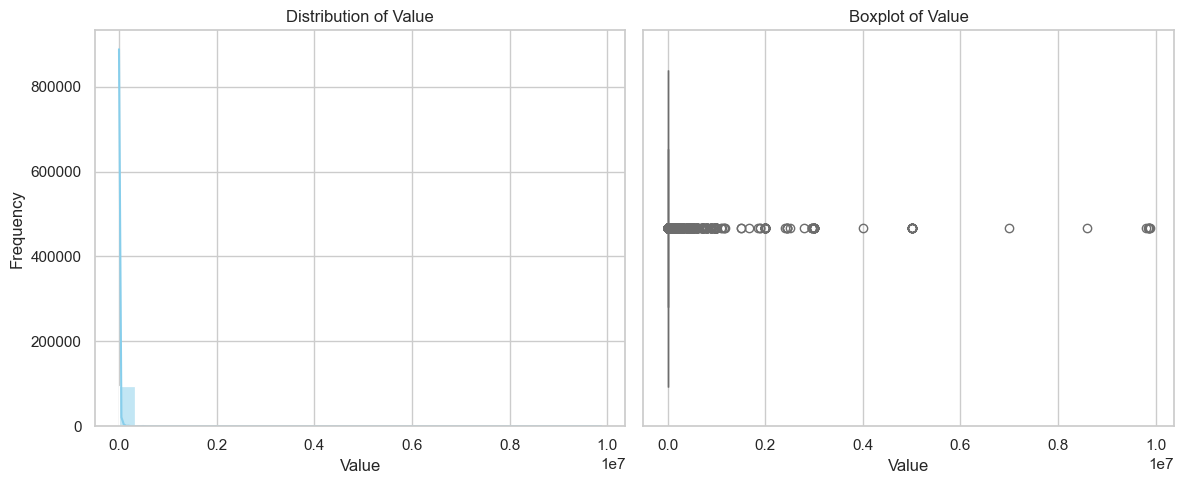

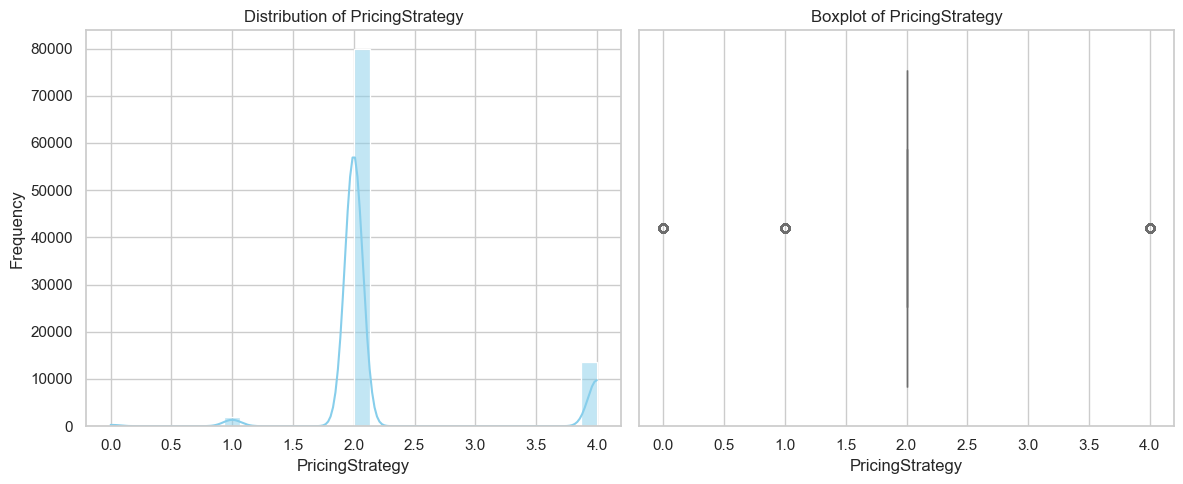

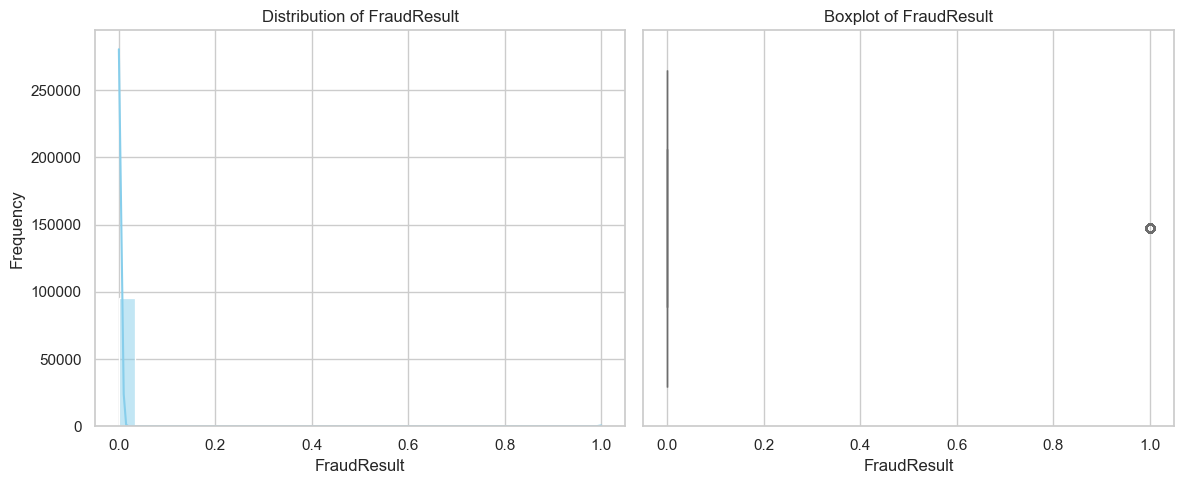

In [5]:
preprocess.numeric_distributions()

### Distribution of Categorical Features

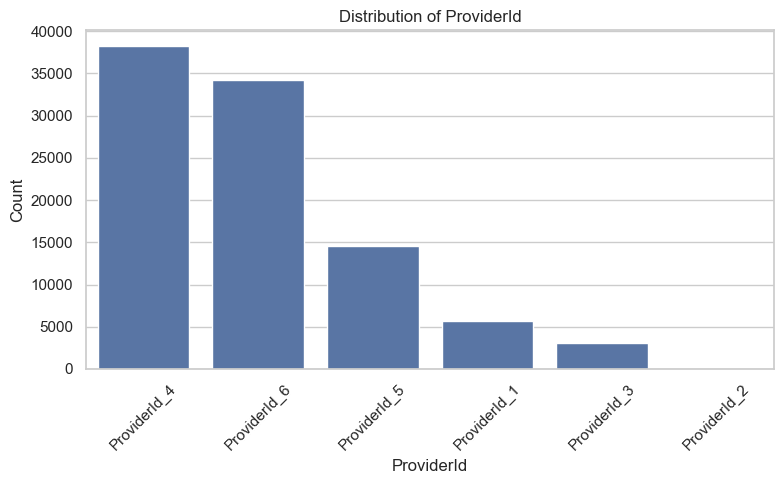

In [17]:
preprocess.categorical_distributions(column='ProviderId')

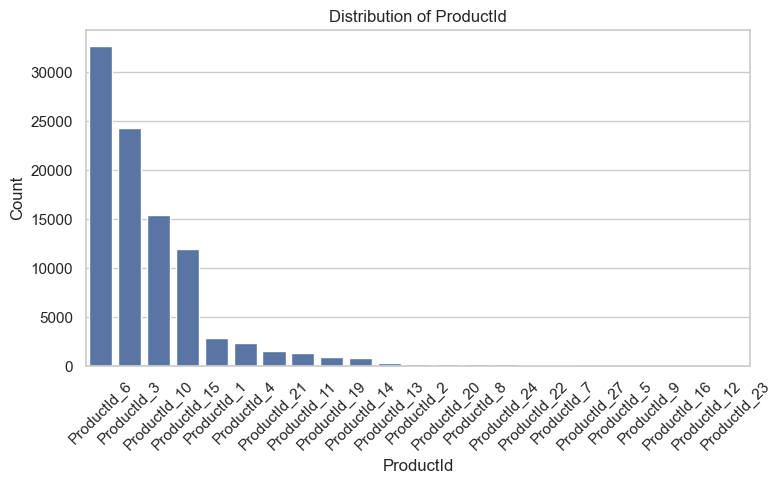

In [18]:
preprocess.categorical_distributions(column='ProductId')

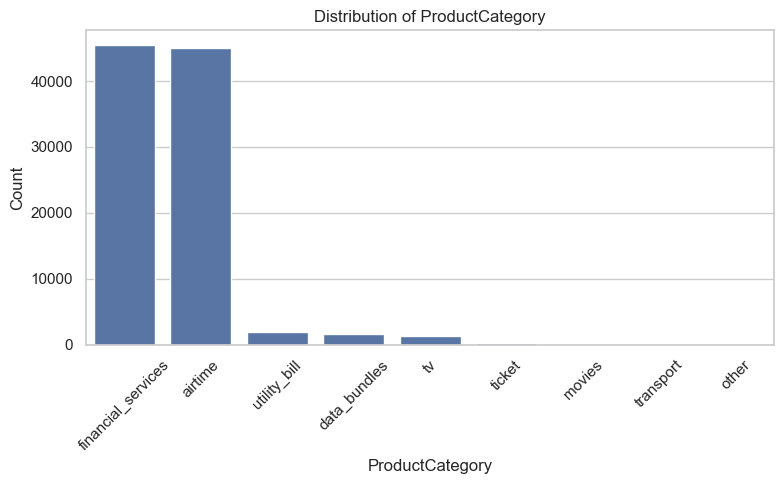

In [19]:
preprocess.categorical_distributions(column='ProductCategory')

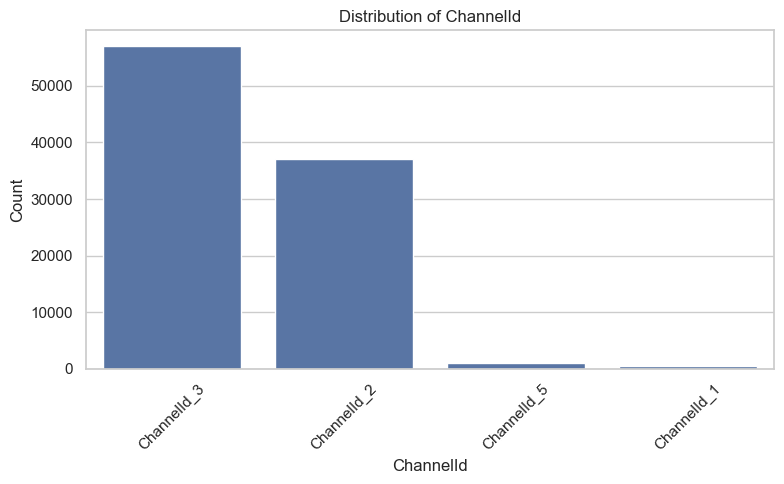

In [20]:
preprocess.categorical_distributions(column='ChannelId')

### Correlation Analysis

In [6]:
df.select_dtypes(include=[np.number]).corr()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


### Correlation Analysis
○	Understanding the relationship between numerical features

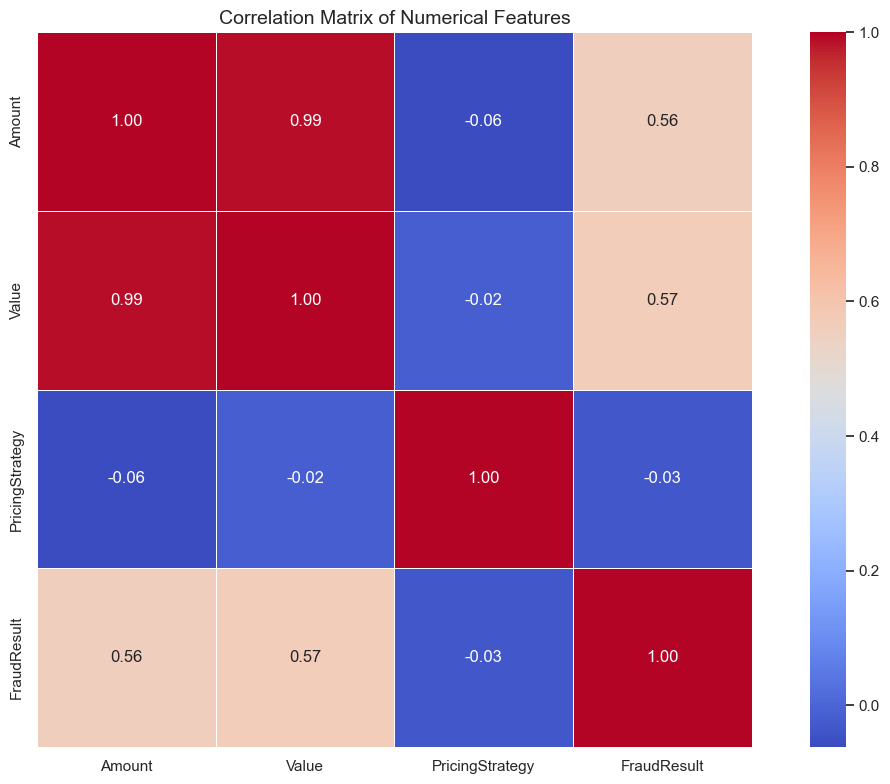

In [22]:
preprocess.plot_correlation_matrix()

### Identifying Missing Values
○	Identify missing values to determine missing data and decide on appropriate imputation strategies


--- Missing Values Summary ---

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

Visualizing Missingness (useful for pattern detection):


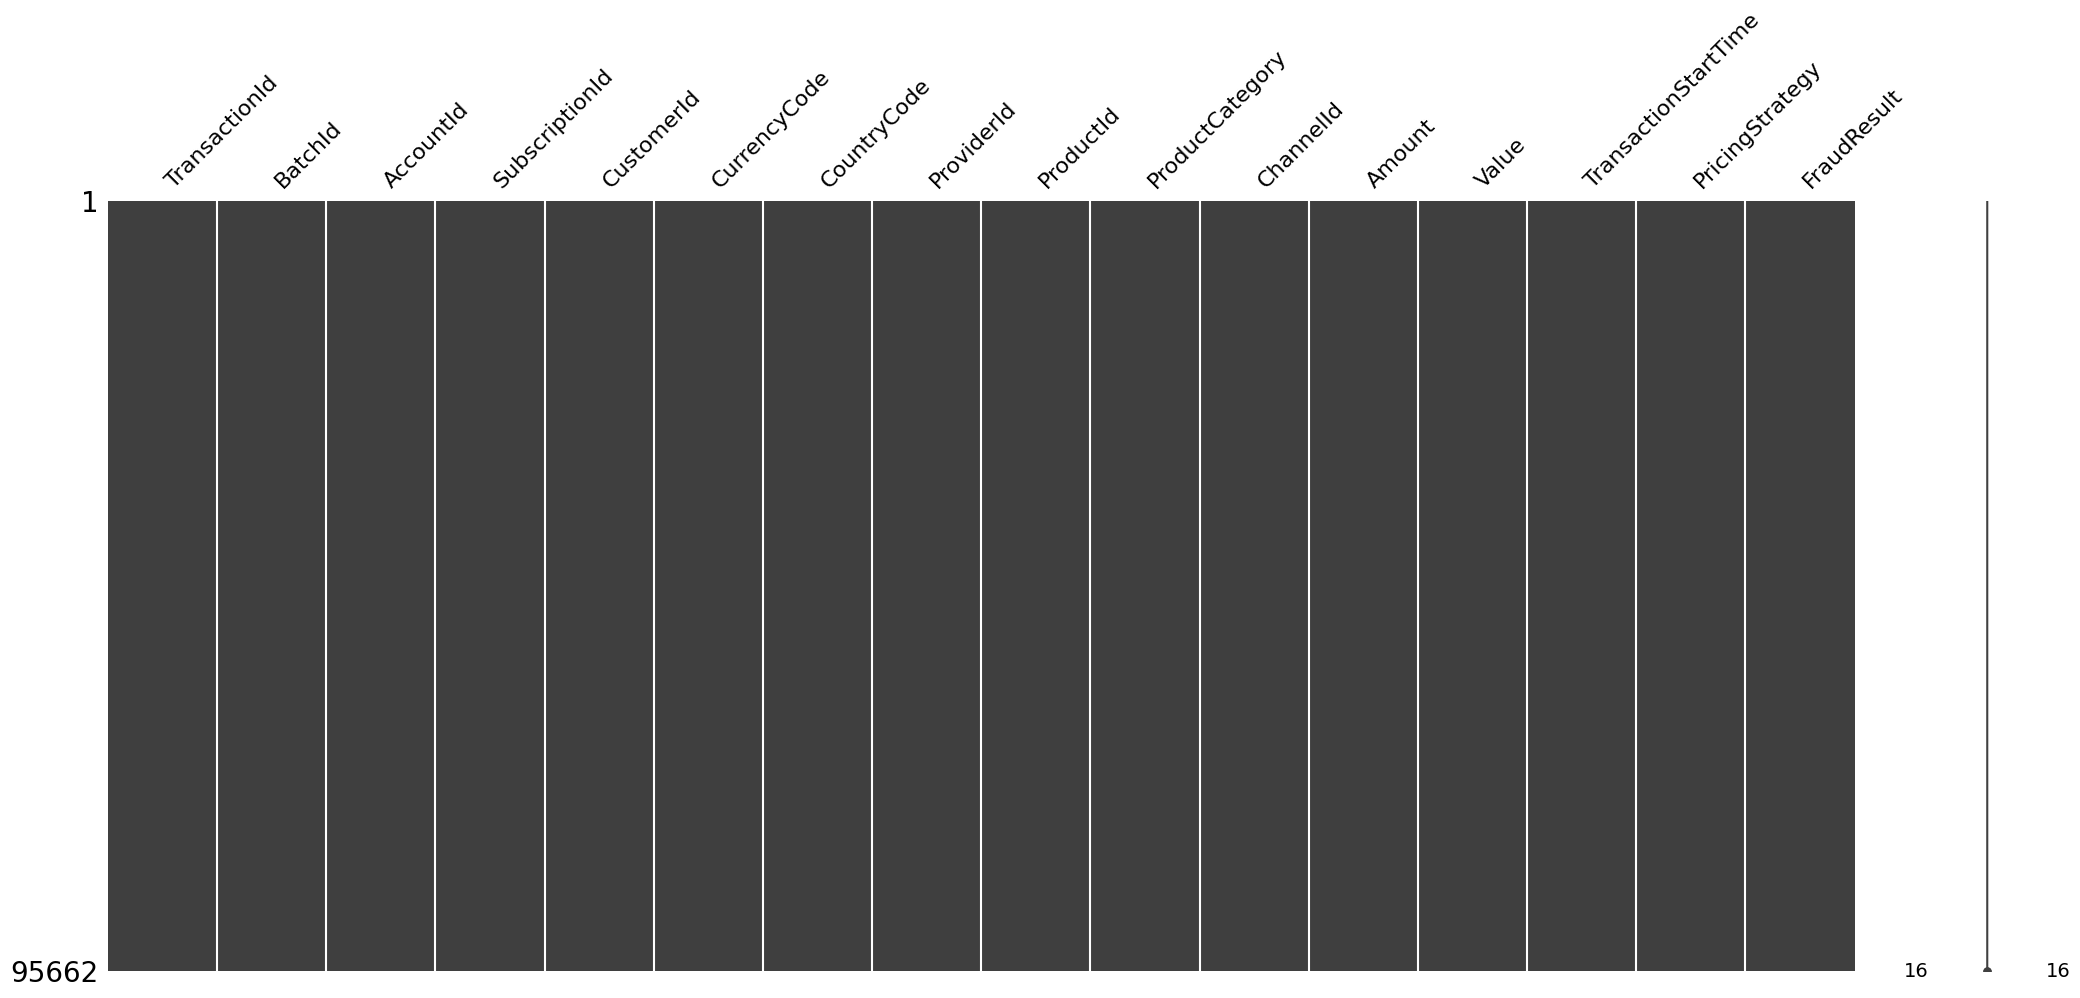

In [4]:
preprocess.missing_values()

### Outlier Detection


--- Outlier Detection Using Boxplots ---



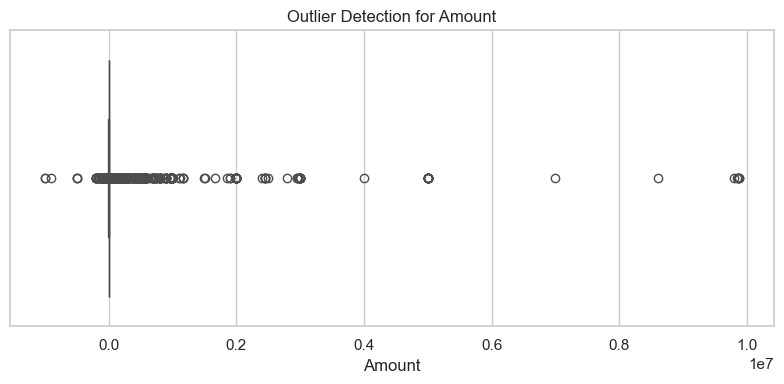

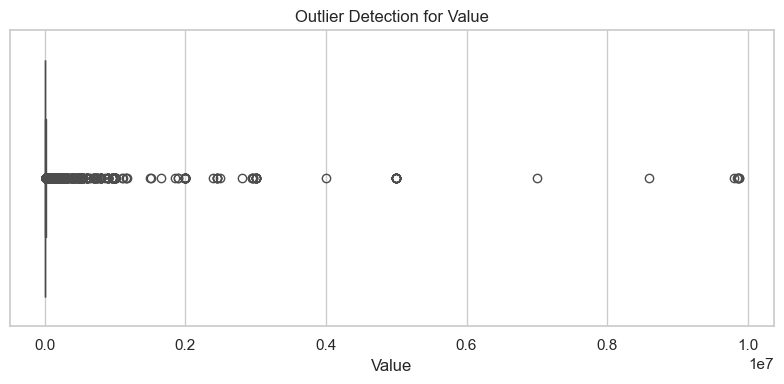

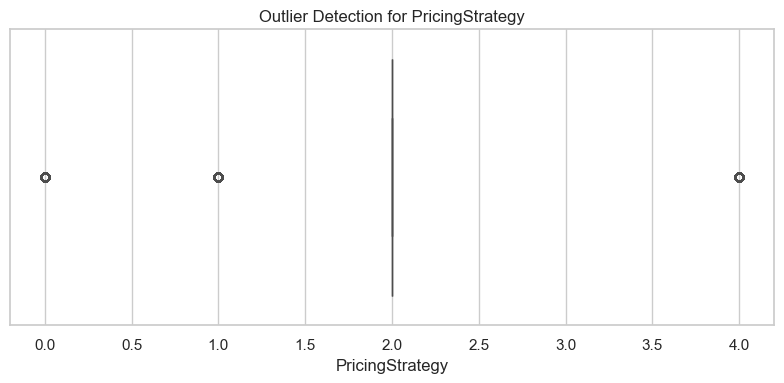

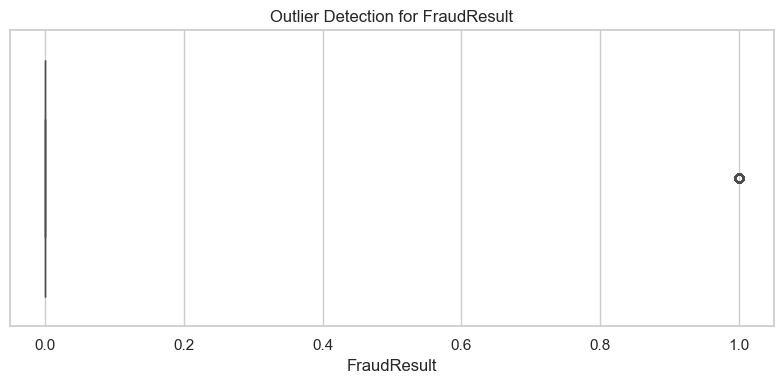

In [24]:
preprocess.detect_outliers()

# Feature Engineering
Build a robust, automated, and reproducible data processing script that transforms raw data into a model-ready format.

In [5]:
# drop columns
df = df.drop(columns=['CountryCode','CurrencyCode', 'BatchId','Value'], axis=1)

### Create Aggregate Features

In [6]:
feature = FeatureEngineering(df)

In [7]:
df =feature.create_aggregate_features()

In [9]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


### Extract Features

In [8]:
df = feature.extract_datetime_features()

In [7]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


### Encode Categorical Variables
Convert categorical variables into numerical format by using onehot

In [9]:
df = feature.encode_categorical_variables()

In [11]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Handle Missing Values
Use imputation or Removal to handle missing values

In [10]:
df = feature.handle_missing_values()

In [15]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2.0,0.0,109921.75,923.712185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2.0,0.0,109921.75,923.712185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2.0,0.0,1000.00,500.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2.0,0.0,228727.20,6019.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2.0,0.0,228727.20,6019.136842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Normalize/Standardize Numerical Features
Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.

In [9]:
df = feature.normalize_or_standardize()

In [17]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,-0.046371,2018-11-15 02:18:49+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-0.054643,2018-11-15 02:19:08+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,-0.050426,2018-11-15 02:44:21+00:00,-0.349252,-0.044962,0.165122,-0.072568,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,0.107717,2018-11-15 03:32:55+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,6.987414,-0.796656,0.824740,-0.105245
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-0.059704,2018-11-15 03:34:21+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245


# Proxy Target Variable Engineering 

The goal of this task is to create one. You will do this by programmatically identifying a group of "disengaged" customers and labeling them as high-risk proxies. High-risk groups are those with high likelihood of default - those who do not pay the loan principal and interest in the specified time frame.

In [11]:
rfm_score = CreditScoring(df)

In [12]:
# Calculate RFMS scores
rfms_scores = rfm_score.calculate_rfm_metrics()

In [13]:
df = rfms_scores

In [14]:
rfms_scores.sort_values(by = 'No_Subscription', ascending=False)

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score
59797,TransactionId_44159,AccountId_398,SubscriptionId_3350,CustomerId_4315,-115000.0,2019-01-14 06:28:25+00:00,2.0,0.0,434447.0,3367.806202,...,0.0,0.0,0.0,1.0,31,129,-115000.0,3,3,-28709.25
28440,TransactionId_60301,AccountId_398,SubscriptionId_3350,CustomerId_4315,-115000.0,2018-12-15 14:15:32+00:00,2.0,0.0,434447.0,3367.806202,...,0.0,0.0,0.0,1.0,60,129,-115000.0,3,3,-28702.00
73058,TransactionId_119486,AccountId_830,SubscriptionId_1262,CustomerId_1175,5000000.0,2019-01-25 18:21:38+00:00,0.0,1.0,8942702.5,37106.649378,...,0.0,0.0,1.0,0.0,19,241,5000000.0,3,3,1250065.75
24062,TransactionId_55108,AccountId_4421,SubscriptionId_4038,CustomerId_4878,2000000.0,2018-12-12 12:49:31+00:00,0.0,0.0,50804960.0,247829.073171,...,0.0,0.0,1.0,0.0,63,205,2000000.0,3,4,500067.75
24059,TransactionId_47418,AccountId_4421,SubscriptionId_4038,CustomerId_4878,2000000.0,2018-12-12 12:47:28+00:00,2.0,0.0,50804960.0,247829.073171,...,0.0,0.0,1.0,0.0,63,205,2000000.0,3,4,500067.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52601,TransactionId_79801,AccountId_4249,SubscriptionId_4429,CustomerId_7343,-160000.0,2019-01-08 10:03:22+00:00,4.0,0.0,-104900000.0,-25641.652408,...,0.0,1.0,0.0,0.0,36,4091,-160000.0,1,1,-38968.00
14788,TransactionId_8684,AccountId_4249,SubscriptionId_4429,CustomerId_7343,-160000.0,2018-12-04 15:16:01+00:00,4.0,0.0,-104900000.0,-25641.652408,...,0.0,1.0,0.0,0.0,71,4091,-160000.0,1,1,-38959.25
55745,TransactionId_89932,AccountId_4249,SubscriptionId_4429,CustomerId_7338,-150000.0,2019-01-10 14:05:55+00:00,2.0,0.0,-2760000.0,-306666.666667,...,1.0,1.0,0.0,0.0,34,9,-150000.0,1,1,-37489.00
4200,TransactionId_42574,AccountId_4249,SubscriptionId_4429,CustomerId_7341,-150000.0,2018-11-20 04:26:47+00:00,2.0,0.0,-150000.0,-150000.000000,...,1.0,1.0,0.0,0.0,86,1,-150000.0,1,1,-37478.00


### Cluster Customers
 Use the K-Means clustering algorithm to segment customers into 3 distinct groups based on their RFM profiles

In [15]:
clustered_df, rfm_data = rfm_score.cluster_customers_rfm()

In [16]:
rfm_data['Cluster'].value_counts()

Cluster
1    1582
0    1154
2    1006
Name: count, dtype: int64

In [17]:
rfm_data.shape

(3742, 11)

In [18]:
clustered_df.shape

(95662, 61)

In [19]:
clustered_df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score,Cluster
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2.0,0.0,109921.75,923.712185,...,0.0,1.0,0.0,91,119,1000.0,3,3,303.25,2
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2.0,0.0,109921.75,923.712185,...,1.0,0.0,0.0,91,119,-20.0,3,3,48.25,2
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2.0,0.0,1000.00,500.000000,...,0.0,1.0,0.0,91,2,500.0,1,1,148.50,0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2.0,0.0,228727.20,6019.136842,...,0.0,1.0,0.0,91,38,20000.0,3,3,5033.00,2
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2.0,0.0,228727.20,6019.136842,...,1.0,0.0,0.0,91,38,-644.0,3,3,-128.00,2


In [20]:
clustered_df['Cluster'].value_counts()

Cluster
2    75392
1    17765
0     2505
Name: count, dtype: int64

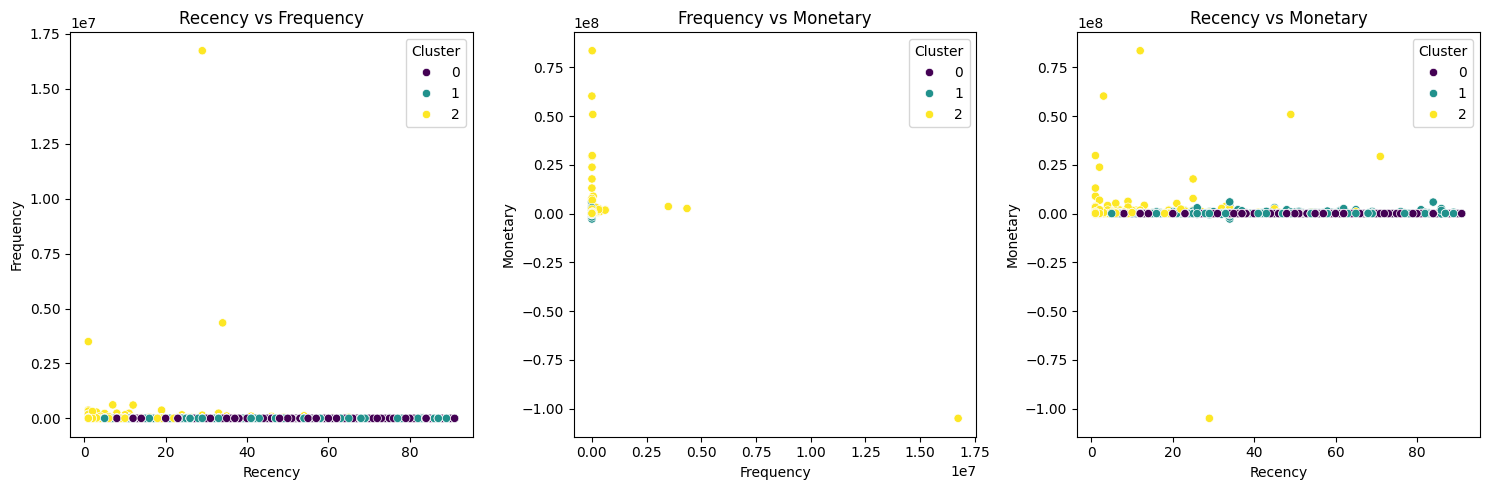

In [21]:
rfm_score.plot_rfm_clusters()

### Define and Assign the "High-Risk" Label

Analyze the resulting clusters to determine which one represents the least engaged and therefore highest-risk customer segment (typically characterized by low frequency and low monetary value).

In [22]:
rfm_score.assign_high_risk_label(rfm_data)

Identified Cluster 2 as high-risk:
   Cluster    Recency     Frequency       Monetary  risk_score
0        0  46.974003      7.820624    2806.780243         3.0
1        1  36.530973    287.894437   92106.954134         6.0
2        2   5.693837  36907.618290  490745.924115         9.0

High-risk customers: 75392
Risk distribution:
is_high_risk
1    75392
0    20270
Name: count, dtype: int64


,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score,Cluster,is_high_risk
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2.0,0.0,109921.75,923.712185,...,1.0,0.0,91,119,1000.0,3,3,303.25,2,1
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2.0,0.0,109921.75,923.712185,...,0.0,0.0,91,119,-20.0,3,3,48.25,2,1
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2.0,0.0,1000.00,500.000000,...,1.0,0.0,91,2,500.0,1,1,148.50,0,0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2.0,0.0,228727.20,6019.136842,...,1.0,0.0,91,38,20000.0,3,3,5033.00,2,1
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2.0,0.0,228727.20,6019.136842,...,0.0,0.0,91,38,-644.0,3,3,-128.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,AccountId_4841,SubscriptionId_3829,CustomerId_3078,-1000.0,2019-02-13 09:54:09+00:00,2.0,0.0,2438140.00,4255.043630,...,0.0,0.0,1,573,-1000.0,2,3,-106.00,2,1
95658,TransactionId_91597,AccountId_3439,SubscriptionId_2643,CustomerId_3874,1000.0,2019-02-13 09:54:25+00:00,2.0,0.0,58499.60,1360.455814,...,1.0,0.0,1,43,1000.0,2,3,261.50,2,1
95659,TransactionId_82501,AccountId_4841,SubscriptionId_3829,CustomerId_3874,-20.0,2019-02-13 09:54:35+00:00,2.0,0.0,58499.60,1360.455814,...,0.0,0.0,1,43,-20.0,2,3,6.50,2,1
95660,TransactionId_136354,AccountId_1346,SubscriptionId_652,CustomerId_1709,3000.0,2019-02-13 10:01:10+00:00,2.0,0.0,851985.00,1625.925573,...,1.0,0.0,1,524,3000.0,2,2,881.75,2,1


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Resample training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [23]:
clustered_df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score,Cluster,is_high_risk
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2.0,0.0,109921.75,923.712185,...,1.0,0.0,91,119,1000.0,3,3,303.25,2,1
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2.0,0.0,109921.75,923.712185,...,0.0,0.0,91,119,-20.0,3,3,48.25,2,1
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2.0,0.0,1000.00,500.000000,...,1.0,0.0,91,2,500.0,1,1,148.50,0,0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2.0,0.0,228727.20,6019.136842,...,1.0,0.0,91,38,20000.0,3,3,5033.00,2,1
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2.0,0.0,228727.20,6019.136842,...,0.0,0.0,91,38,-644.0,3,3,-128.00,2,1


In [ ]:
# Saving the preprocessed data to the folder.
clustered_df.to_csv('../Data/processed/credit_score_processed_data.csv')

# Model Training and Tracking
To develop a structured model training process that includes experiment tracking, model versioning, and unit testing.

In [2]:
# Read the preprocessed dataset
df_pre= pd.read_csv('../Data/processed/credit_score_processed_data.csv')

In [15]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          95662 non-null  int64  
 1   TransactionId                       95662 non-null  object 
 2   AccountId                           95662 non-null  object 
 3   SubscriptionId                      95662 non-null  object 
 4   CustomerId                          95662 non-null  object 
 5   Amount                              95662 non-null  float64
 6   TransactionStartTime                95662 non-null  object 
 7   PricingStrategy                     95662 non-null  float64
 8   FraudResult                         95662 non-null  float64
 9   TotalTransactionAmount              95662 non-null  float64
 10  AvgTransactionAmount                95662 non-null  float64
 11  TransactionCount                    95662

In [21]:
df_pre.columns

Index(['Unnamed: 0', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AvgTransactionAmount', 'TransactionCount',
       'StdTransactionAmount', 'TransactionHour', 'TransactionDay',
       'TransactionMonth', 'TransactionYear', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_10', 'ProductId_ProductId_11',
       'ProductId_ProductId_12', 'ProductId_ProductId_13',
       'ProductId_ProductId_14', 'ProductId_ProductId_15',
       'ProductId_ProductId_16', 'ProductId_ProductId_19',
       'ProductId_ProductId_2', 'ProductId_ProductId_20',
       'ProductId_ProductId_21', 'ProductId_ProductId_22',
       'ProductId_ProductId_23', 'ProductId_ProductId_24',
       'ProductId_ProductId_27', 'ProductId_ProductId_3',
       'ProductId_ProductId_4', 'ProductId_ProductId_5',
       'ProductId_ProductId_6', 'ProductId_ProductId_7',
       'ProductId_Pro

In [3]:
df_pre = df_pre.drop(columns=['Unnamed: 0','TransactionStartTime','CustomerId', 'SubscriptionId','AccountId', 'TransactionId','Amount',
                              'Recency','Frequency', 'Monetary', 'No_Subscription','No_Account', 'RFMS_Score', 'Cluster','TransactionYear',
                              'ProviderId_ProviderId_3',],axis=1)

In [4]:
# Select numeric features only
numeric_df = df_pre.select_dtypes(include=['float64', 'int64'])

# Drop ID or target columns if needed
#numeric_df = numeric_df.drop(columns=['CustomerId', 'is_high_risk'], errors='ignore')

# Compute correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Display top correlated pairs (excluding self-correlation)
def print_high_corr(corr_matrix, threshold=0.8):
    corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
    high_corr = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > threshold)]
    print("\nHighly Correlated Pairs (|r| > {:.2f}):".format(threshold))
    print(high_corr)

In [5]:
print_high_corr(corr_matrix)


Highly Correlated Pairs (|r| > 0.80):
ChannelId_ChannelId_3         ProviderId_ProviderId_4         0.988371
ProviderId_ProviderId_4       ChannelId_ChannelId_3           0.988371
                              ChannelId_ChannelId_2           0.977313
ChannelId_ChannelId_2         ProviderId_ProviderId_4         0.977313
                              ChannelId_ChannelId_3           0.965948
ChannelId_ChannelId_3         ChannelId_ChannelId_2           0.965948
ProductCategory_data_bundles  ProductId_ProductId_11          0.922796
ProductId_ProductId_11        ProductCategory_data_bundles    0.922796
ProductId_ProductId_6         ChannelId_ChannelId_2           0.902978
ChannelId_ChannelId_2         ProductId_ProductId_6           0.902978
ProductId_ProductId_21        ProductCategory_utility_bill    0.885487
ProductCategory_utility_bill  ProductId_ProductId_21          0.885487
ProductId_ProductId_6         ProviderId_ProviderId_4         0.882487
ProviderId_ProviderId_4       ProductI

In [6]:
models = RiskPrediction(df_pre)

### Split the Data
Splitting the data into training and testing sets helps evaluate the model’s performance on unseen data


In [7]:
models.split_data()

✅ Data split and sampled:
Train size: (103832, 46), Test size: (19133, 46)
Train target distribution:
 is_high_risk
0    51916
1    51916
Name: count, dtype: int64


## Train the Models

### Logistic Regression
A simple and interpretable linear model that estimates the probability of a binary outcome using a logistic function.

In [8]:
models.train_logistic_regression()

LogisticRegression(max_iter=1000, random_state=42)

### Random Forest
An ensemble of decision trees that improves prediction accuracy and controls overfitting by averaging multiple tree outputs.

In [9]:
models.train_random_forest()

RandomForestClassifier(random_state=42)

### Gradient Boosting Machines (GBM)
A powerful ensemble technique that builds trees sequentially, where each new tree corrects the errors of the previous ones.

In [10]:
models.train_XGBoost()

GradientBoostingClassifier(random_state=42)

## Model Evaluation

In [11]:
models.LR_models_evaluate()

Logistic Regression:
Accuracy: 0.894893639262008
Precision: 0.9661679700782047
Recall: 0.8757223206718545
F1 Score: 0.9187244877339046
ROC-AUC: 0.9760666357792092


In [12]:
models.RF_models_evaluate()


Random Forest:
Accuracy: 0.9999477342810851
Precision: 1.0
Recall: 0.9999229524616688
F1 Score: 0.9999614747466965
ROC-AUC: 1.0


In [13]:
models.XGB_models_evaluate()


XGB Boosting:
Accuracy: 0.9989024199027857
Precision: 0.9992294652488827
Recall: 0.9991524770783573
F1 Score: 0.9991909696806256
ROC-AUC: 0.9999926758514911


### Hyperparameter Tunning
Improve model performance using hyperparameter tuning, use techniques 


In [14]:
models.tune_random_forest()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [15]:
models.evaluate_tuned_random_forest()


✅ Tuned Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


### Register Best Model in MLflow Model Registry

MLflow Model Tracking and Registration

In [16]:
models.log_and_register_model(models.rf_r, model_name="credit_rf_model", run_name="RandomForest-Tuned")


2025/07/01 14:29:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 14:29:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/01 14:29:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 14:29:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


credit_rf_model registered to MLflow Model Registry.


Successfully registered model 'credit_rf_model'.
Created version '1' of model 'credit_rf_model'.


# Model Deployment and Continuous Integration
To package the trained model into a containerized API and set up a CI/CD pipeline to automate testing and ensure code quality.